# 🖼️ Face Recognition Prediction

In this notebook, we **use the finalized face recognition pipeline** to perform gender predictions on new images.  

- The pipeline is imported from the `face_recognition.py` module.
- The notebook demonstrates:
  1. Loading a test image.
  2. Running the face recognition pipeline.
  3. Visualizing results with bounding boxes and predicted gender.
  4. Displaying individual face crops and reconstructed eigenfaces.


In [1]:
import cv2
import matplotlib.pyplot as plt
from face_recognition import faceRecognitionPipeline  # import your function


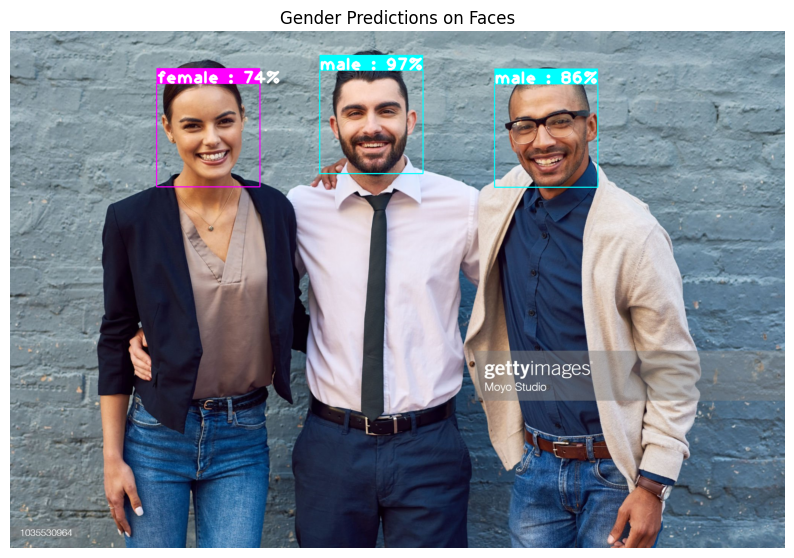

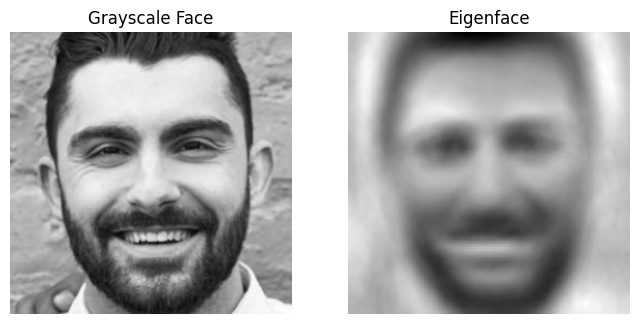

Face 1:
Predicted Gender : male
Confidence Score : 97.87 %
----------------------------------------------------------------------------------------------------


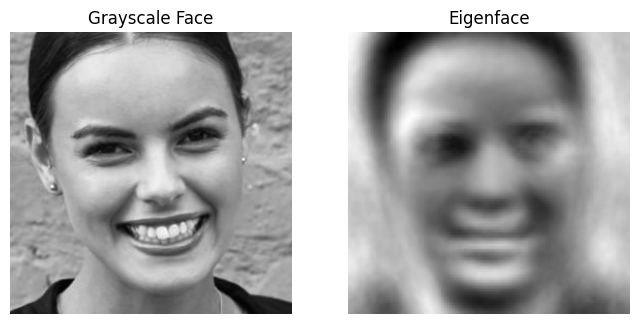

Face 2:
Predicted Gender : female
Confidence Score : 74.48 %
----------------------------------------------------------------------------------------------------


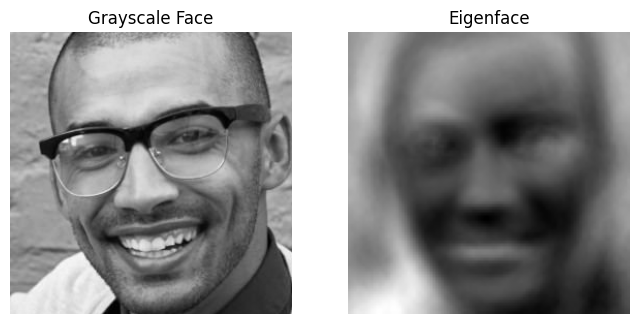

Face 3:
Predicted Gender : male
Confidence Score : 86.83 %
----------------------------------------------------------------------------------------------------


In [2]:
# 🖼️ Face Recognition Prediction


# Run the pipeline on a test image
pred_img, pred_dict = faceRecognitionPipeline('./data/test_images/getty_test.jpg')

# --------------------------
# Display the annotated image
# --------------------------
# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Gender Predictions on Faces")
plt.show()

# --------------------------
# Generate detailed report for each detected face
# --------------------------
for i, pred in enumerate(pred_dict, 1):
    obj_gray = pred['roi']                  # Grayscale face crop
    obj_eig = pred['eig_img'].reshape(100,100)  # Eigenface reconstruction
    
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(obj_gray, cmap='gray')
    plt.title('Grayscale Face')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(obj_eig, cmap='gray')
    plt.title('Eigenface')
    plt.axis('off')
    
    plt.show()
    
    # Print prediction info
    print(f"Face {i}:")
    print(f"Predicted Gender : {pred['prediction_name']}")
    print(f"Confidence Score : {pred['score']*100:.2f} %")
    print('-'*100)


### 🎥 Real-Time Gender Recognition

In this section, we demonstrate **gender prediction on a video stream** or webcam feed using the finalized face recognition pipeline.

**Steps performed:**

1. **Capture Video:**
   - `cv2.VideoCapture()` is used to open a video file or webcam.
   - `0` accesses the default webcam, `1` for an external camera, or a file path for a pre-recorded video.

2. **Frame-by-Frame Processing:**
   - Each frame is read from the video stream.
   - The frame is passed to `faceRecognitionPipeline()` for face detection, preprocessing, PCA transformation, and SVM prediction.

3. **Display Predictions:**
   - Annotated frames are displayed in real-time with bounding boxes, predicted gender, and confidence score.
   - Press **'q'** to quit the stream.

4. **Release Resources:**
   - After processing, the video capture object is released and all OpenCV windows are closed.


In [3]:
# 🎥 Real-Time Gender Recognition

# Load video or webcam
cap = cv2.VideoCapture('./data/test_images/video.mp4')  # use 0 for default webcam

while True:
    ret, frame = cap.read()
    
    if not ret:  # if no frame, end loop
        break
    
    # Run pipeline on current frame
    pred_img, pred_dict = faceRecognitionPipeline(frame, path=False)
    
    # Display annotated frame
    cv2.imshow('Gender Prediction', pred_img)
    
    # Press 'q' to exit
    if cv2.waitKey(1) == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


In [5]:
# ==========================
# 🎥 Real-Time Gender Recognition with Video Saving
# ==========================

# Load video or webcam
cap = cv2.VideoCapture('./data/test_images/video.mp4')  # use 0 for webcam

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define video writer to save output
out = cv2.VideoWriter(
    './data/output_video.mp4', 
    cv2.VideoWriter_fourcc(*'mp4v'),  # codec
    fps,
    (frame_width, frame_height)
)

while True:
    ret, frame = cap.read()
    
    if not ret:  # if no frame, end loop
        break
    
    # Run pipeline on current frame
    pred_img, pred_dict = faceRecognitionPipeline(frame, path=False)
    
    # Write frame to output video
    out.write(pred_img)
    
    # Display annotated frame
    cv2.imshow('Gender Prediction', pred_img)
    
    # Press 'q' to exit
    if cv2.waitKey(1) == ord('q'):
        break

# Release video capture and writer, close windows
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Processed video saved at './data/output_video.mp4'")


✅ Processed video saved at './data/output_video.mp4'


## ✅ Conclusion

In this final notebook, we successfully **integrated all previous steps into a complete face recognition and gender prediction pipeline**. The key highlights include:

1. **Pipeline Implementation**:
   - Imported pre-trained models: Haar Cascade for face detection, PCA for feature extraction, and SVM for classification.
   - Built a modular **`faceRecognitionPipeline`** function that handles preprocessing, eigenface transformation, and gender prediction.

2. **Static Image Prediction**:
   - Predicted gender for images and visualized both the **grayscale face crop** and **eigenface reconstruction**.
   - Displayed prediction confidence scores for each detected face.

3. **Real-Time Video Prediction**:
   - Extended the pipeline to process live video streams or video files.
   - Demonstrated real-time gender recognition with bounding boxes, predicted labels, and confidence scores.

4. **Key Takeaways**:
   - The pipeline provides a **full end-to-end solution** from raw images/videos to predicted gender outputs.
   - PCA-based feature extraction combined with SVM achieved robust performance on cropped face images.
   - The modular structure allows for **easy integration into web applications or desktop apps**.

This notebook completes the **Face Recognition & Gender Classification project**, providing both **batch image predictions** and **real-time video predictions** capabilities.  

**Next Steps** (optional enhancements):  
- Integrate this pipeline into a **Flask or FastAPI application** for web deployment.  
- Add **emotion recognition** or multi-class classification on top of gender prediction.  
- Optimize real-time performance with GPU acceleration or lighter models for faster inference.
